# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [63]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols


---
## Part 1: Statistical Distributions [Suggested time: 20 minutes]
---

### Normal Distributions

Let's consider check totals at a TexMex restaurant. We know that the population distribution of check totals is normally distributed with a mean of $\mu$ = \\$20 and standard deviation of $\sigma$ = \\$3. 

### 1.1) Compute the z-score for a \\$26 check. 

In [64]:
mu = 20
sigma = 3
xbar = 26


zscore = (xbar-mu)/sigma
print(zscore)

2.0


### 1.2) Approximately what percentage of all checks are less than \\$26? Explain how you came to your answer.

In [65]:
"""
zscore is same as stdev after standardizing, 2 st deviations above means roughly 2.2% of checks lie greater than 26, so 97.8% roughly less than 26 
"""


'\nzscore is same as stdev after standardizing, 2 st deviations above means roughly 2.2% of checks lie greater than 26, so 97.8% roughly less than 26 \n'

### Confidence Intervals

One night, a waiter gets 15 checks with a mean of \\$19 and a standard deviation of \\$3.

### 1.3) Calculate the 95% confidence interval around the mean for this waitor's checks. Interpret the result. 

In [66]:
stats.t.interval(alpha=.95,df=15-1,loc=19,scale=3) #loc is our x_bar in this problem, scale is the standard deviation of sample or s

(12.565639936249218, 25.43436006375078)

In [67]:
"""
You can be 95% confident that if a random check is collected, it will fall between those two bounds. alternatively, 5% of the probability distribution area lies outside those bounds and 95% lies inside
"""

'\nYou can be 95% confident that if a random check is collected, it will fall between those two bounds. alternatively, 5% of the probability distribution area lies outside those bounds and 95% lies inside\n'

---
## Part 2: Statistical Testing [Suggested time: 20 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

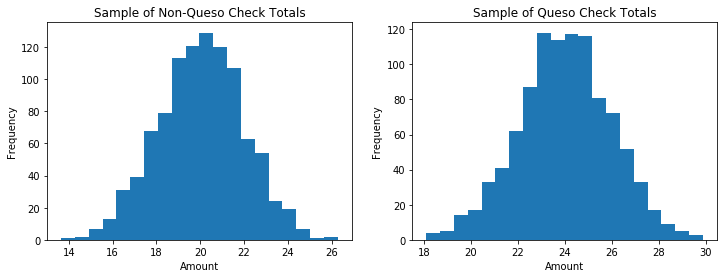

In [68]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [69]:
"""
H_0: customers who order queso spend on average the same amount as those who dont
H_A: customers who order queso spend on average a different amount than those who dont
"""

'\nH_0: customers who order queso spend on average the same amount as those who dont\nH_A: customers who order queso spend on average a different amount than those who dont\n'

### 2.2) What does it mean to make a `Type I` error or a `Type II` error in this specific context?

In [70]:
"""
In this context, a type I error would show that customers who order queso spend on average a different amount than those who don't, when in reality this is not true. Making that error means our accepted margins of error (alpha) too high, or we were just unlucky and our results did not fall in line with the statistically significant results.
"""
"""
A type II error would show that our sample size is most likely too small which lead often to false negatives as smaller sample sizes lead to greater variance. This error is interpreted as accepting that customers who order queso spend on average the same amount as those who dont, when in reality this is not true. 
"""

'\nA type II error would show that our sample size is most likely too small which lead often to false negatives as smaller sample sizes lead to greater variance. This error is interpreted as accepting that customers who order queso spend on average the same amount as those who dont, when in reality this is not true. \n'

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [71]:
#norm since df  
alpha = .05
df = len(no_queso)+len(queso)-2
xbar1 = no_queso.mean()
xbar2 = queso.mean()
t_crit = stats.t.ppf(alpha/2,df)    #double alpha since two tailed so 
#confirming
stats.t.cdf(t_crit,df)
print("t_crit = +" + str(t_crit))
t_obs, p_obs =stats.ttest_ind(queso, no_queso)
print("t-observed = " + str(t_obs) + "\np-observed = " + str(p_obs))

t_crit = +-1.961152014836706
t-observed = 45.16857748646329
p-observed = 1.29670967092511e-307


In [72]:
"""
Reject Null hypothesis, our observed t values far out of bounds of (-1.9611,1.9611), conclude that customers who order queso spend a statistically significantly greater amount than those who don't.
"""

"\nReject Null hypothesis, our observed t values far out of bounds of (-1.9611,1.9611), conclude that customers who order queso spend a statistically significantly greater amount than those who don't.\n"

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

A medical test is designed to diagnose a certain disease. The test has a false positive rate of 10%, meaning that 10% of people without the disease will get a positive test result. The test has a false negative rate of 2%, meaning that 2% of people with the disease will get a negative result. Only 1% of the population has this disease.

### 3.1) If a patient receives a positive test result, what is the probability that they actually have the disease? Show how you arrive at your answer.

In [1]:
#Looking for probability of A given B     P(A|B), or probability of having the disease given a false positive test result. P(B) = .9, P(A) = .01, P(B|A) = 1 since its a given that you have the disease
#boils down to just P(A)/P(B)
print("Probability of having the disease: " +  str(.01*100/.9)+"%")

Probability of having the disease: 1.1111111111111112%


---
## Part 4: Linear Regression [Suggested Time: 20 min]
---

In this section, you'll be using the Advertising data to run regression models. In this dataset, each row represents a different product, and we have a sample of 200 products from a larger population of products. We have three features - `TV`, `radio`, and `newspaper` - that describe how many thousands of advertising dollars were spent promoting the product. The target, `sales`, describes how many millions of dollars in sales the product had.

The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [74]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [75]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

### Simple Linear Regression

### 4.1) Use StatsModels' `ols`-function to run a linear regression model using `TV` to predict `sales`. 

**Required output:** the summary of this regression model.

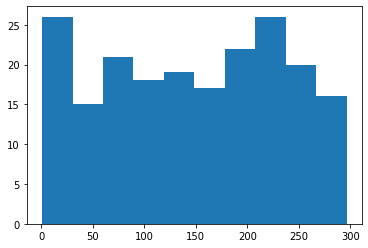

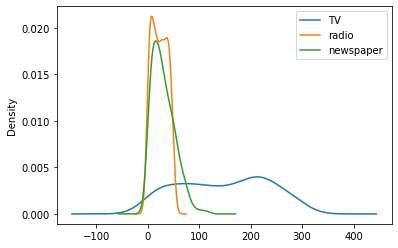

In [76]:
plt.hist(X.TV)
X.plot.kde()

(array([47., 41., 35., 30., 21., 13.,  9.,  2.,  1.,  1.]),
 array([  0.3 ,  11.67,  23.04,  34.41,  45.78,  57.15,  68.52,  79.89,
         91.26, 102.63, 114.  ]),
 <a list of 10 Patch objects>)

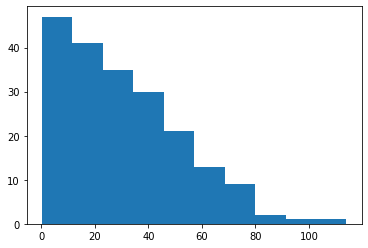

In [77]:
plt.hist(X.newspaper)

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <a list of 10 Patch objects>)

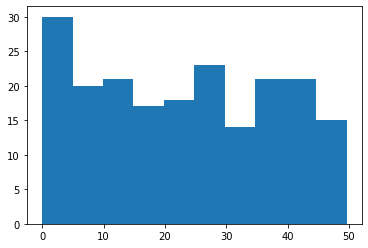

In [78]:
plt.hist(X.radio)

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <a list of 10 Patch objects>)

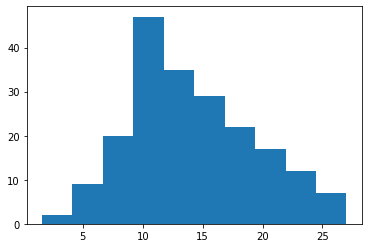

In [79]:
plt.hist(y)

In [80]:
linregModel = ols(formula='sales~TV',data=data).fit()
linregModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        13:06:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.2) Do these results imply that _all_ products that receive more TV advertising have greater sales? Explain how you determined this based on the model output. 

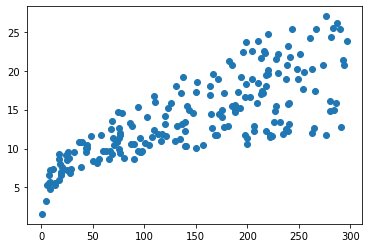

In [81]:
"""
No, they do not imply that all products that recieve more TV advertising have greater sales. While the kde of TVs and radios look similar, newspapers seem to have no correlation. Combining this lack of correlation between TV and newspapers with the probability value
based on the F-statistic basically being 0 means that we are incredibly unlikely to replicate the significance of the fit based on this sample. R squared is also relatively low suggesting high error with our fit line due to variance by the dataset. Because we are not able to correlate newspaper sales to TV advertising, we cannot imply that TV advertising will produce greater sales in all products.
"""
plt.scatter(X.TV,y)

### Multiple Linear Regression

### 4.3) Compute a correlation matrix for `X`. Does this suggest that any of the features are strongly collinear? 

In [82]:
X.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


In [83]:
"""
Suggests none are strongly collinear. At best, low positive correlation between radio and newspaper
"""

'\nSuggests none are strongly collinear. At best, low positive correlation between radio and newspaper\n'

### 4.4) Use StatsModels' `ols`-function to run a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the summary of this regression model.

In [84]:
mrm = ols(formula='sales~TV+radio+newspaper',data=data).fit()
mrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.58e-96
Time:                        13:06:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.5) Does this model do a better job of predicting sales than the previous model using only the `TV` feature? Explain how you determined this based on the model output. 

In [85]:
"""
Yes, this does a much better job of predicting sales as we can now see how each independant point changes as the sales increase by the coefficients. Effectively this allows us to look at each independant category and how it alone affects the dependant variable of sales, as well as calculated error for each respective category. 
"""

'\nYes, this does a much better job of predicting sales as we can now see how each independant point changes as the sales increase by the coefficients. Effectively this allows us to look at each independant category and how it alone affects the dependant variable of sales, as well as calculated error for each respective category. \n'